In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)
tqdm.pandas()
import shapefile

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'merge selected.ipynb',
 'Prepped Data',
 '메인 데이터 EDA 1 - 주소 nan, top1 도로명.ipynb',
 '메인 데이터 베이스라인 준비 20211202.ipynb',
 '연속지적_서울',
 '연속지적도 SHP 파일 EDA.ipynb',
 '위치정보관련',
 '좌표 데이터 prep 2 - up to date data.ipynb',
 '좌표 데이터 준비.ipynb',
 '토지특성정보 + 좌표 데이터 합침.ipynb',
 '토지특성정보 데이터 EDA, preprocessing, feature engineering - land_specs_last_baseline_20211116.csv.ipynb',
 '토지특성정보 데이터 EDA, preprocessing, feature engineering.ipynb',
 '토지특성정보 데이터 베이스라인 준비 20211116.ipynb']

In [3]:
os.listdir('./연속지적_서울/')

['LSMD_CONT_LDREG.xlsx',
 'LSMD_CONT_LDREG_서울_강남구',
 'LSMD_CONT_LDREG_서울_강동구',
 'LSMD_CONT_LDREG_서울_강북구',
 'LSMD_CONT_LDREG_서울_강서구',
 'LSMD_CONT_LDREG_서울_관악구',
 'LSMD_CONT_LDREG_서울_광진구',
 'LSMD_CONT_LDREG_서울_구로구',
 'LSMD_CONT_LDREG_서울_금천구',
 'LSMD_CONT_LDREG_서울_노원구',
 'LSMD_CONT_LDREG_서울_도봉구',
 'LSMD_CONT_LDREG_서울_동대문구',
 'LSMD_CONT_LDREG_서울_동작구',
 'LSMD_CONT_LDREG_서울_마포구',
 'LSMD_CONT_LDREG_서울_서대문구',
 'LSMD_CONT_LDREG_서울_서초구',
 'LSMD_CONT_LDREG_서울_성동구',
 'LSMD_CONT_LDREG_서울_성북구',
 'LSMD_CONT_LDREG_서울_송파구',
 'LSMD_CONT_LDREG_서울_양천구',
 'LSMD_CONT_LDREG_서울_영등포구',
 'LSMD_CONT_LDREG_서울_용산구',
 'LSMD_CONT_LDREG_서울_은평구',
 'LSMD_CONT_LDREG_서울_종로구',
 'LSMD_CONT_LDREG_서울_중구',
 'LSMD_CONT_LDREG_서울_중랑구']

In [4]:
basedir = './연속지적_서울/'

In [5]:
foldernames = [f for f in os.listdir(basedir) if '.' not in f]
foldernames

['LSMD_CONT_LDREG_서울_강남구',
 'LSMD_CONT_LDREG_서울_강동구',
 'LSMD_CONT_LDREG_서울_강북구',
 'LSMD_CONT_LDREG_서울_강서구',
 'LSMD_CONT_LDREG_서울_관악구',
 'LSMD_CONT_LDREG_서울_광진구',
 'LSMD_CONT_LDREG_서울_구로구',
 'LSMD_CONT_LDREG_서울_금천구',
 'LSMD_CONT_LDREG_서울_노원구',
 'LSMD_CONT_LDREG_서울_도봉구',
 'LSMD_CONT_LDREG_서울_동대문구',
 'LSMD_CONT_LDREG_서울_동작구',
 'LSMD_CONT_LDREG_서울_마포구',
 'LSMD_CONT_LDREG_서울_서대문구',
 'LSMD_CONT_LDREG_서울_서초구',
 'LSMD_CONT_LDREG_서울_성동구',
 'LSMD_CONT_LDREG_서울_성북구',
 'LSMD_CONT_LDREG_서울_송파구',
 'LSMD_CONT_LDREG_서울_양천구',
 'LSMD_CONT_LDREG_서울_영등포구',
 'LSMD_CONT_LDREG_서울_용산구',
 'LSMD_CONT_LDREG_서울_은평구',
 'LSMD_CONT_LDREG_서울_종로구',
 'LSMD_CONT_LDREG_서울_중구',
 'LSMD_CONT_LDREG_서울_중랑구']

In [6]:
os.listdir(basedir + foldernames[0])

['LSMD_CONT_LDREG_11680.dbf',
 'LSMD_CONT_LDREG_11680.shp',
 'LSMD_CONT_LDREG_11680.shx']

In [7]:
sf = shapefile.Reader(basedir + foldernames[0] + '/LSMD_CONT_LDREG_11680.shp')

In [8]:
sf.shapeType

5

In [9]:
len(sf)

34503

In [10]:
sf.bbox

[200690.0460000001, 439332.7410000004, 210917.78399999999, 448179.31900000013]

In [11]:
shapes = sf.shapes()

In [12]:
len(shapes)

34503

In [13]:
dir(sf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__fieldposition_lookup',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'close',
 'dbf',
 'encoding',
 'encodingErrors',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'load_dbf',
 'load_shp',
 'load_shx',
 'mbox',
 'numRecords',
 'numShapes',
 'record',
 'records',
 'shape'

In [14]:
dir(sf.shape(0))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_from_geojson',
 'bbox',
 'parts',
 'points',
 'shapeType',
 'shapeTypeName']

In [15]:
sf.shape(0).points

[(202646.1900000004, 446278.22000000067),
 (202635.61000000034, 446304.4199999999),
 (202639.33000000007, 446305.9000000004),
 (202649.91000000015, 446279.69999999925),
 (202690.8200000003, 446295.9000000004),
 (202692.3200000003, 446292.1899999995),
 (202637.90000000037, 446270.6300000008),
 (202647.86000000034, 446245.8499999996),
 (202644.13999999966, 446244.3699999992),
 (202634.1799999997, 446269.1500000004),
 (202581.58000000007, 446248.3100000005),
 (202579.88999999966, 446251.94999999925),
 (202646.1900000004, 446278.22000000067)]

In [16]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

c:\users\max6296\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: setting an array element with a sequence.

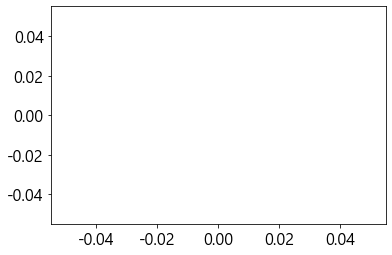

In [17]:
sns.scatterplot(sf.shape(0).points)

In [18]:
sf.shape(0).points

[(202646.1900000004, 446278.22000000067),
 (202635.61000000034, 446304.4199999999),
 (202639.33000000007, 446305.9000000004),
 (202649.91000000015, 446279.69999999925),
 (202690.8200000003, 446295.9000000004),
 (202692.3200000003, 446292.1899999995),
 (202637.90000000037, 446270.6300000008),
 (202647.86000000034, 446245.8499999996),
 (202644.13999999966, 446244.3699999992),
 (202634.1799999997, 446269.1500000004),
 (202581.58000000007, 446248.3100000005),
 (202579.88999999966, 446251.94999999925),
 (202646.1900000004, 446278.22000000067)]

In [19]:
[p[0] for p in sf.shape(0).points]

[202646.1900000004,
 202635.61000000034,
 202639.33000000007,
 202649.91000000015,
 202690.8200000003,
 202692.3200000003,
 202637.90000000037,
 202647.86000000034,
 202644.13999999966,
 202634.1799999997,
 202581.58000000007,
 202579.88999999966,
 202646.1900000004]

<AxesSubplot:>

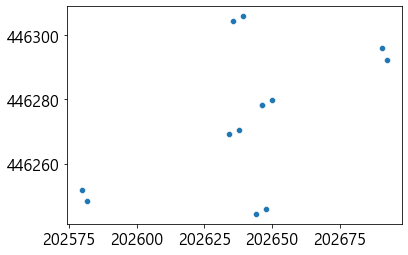

In [20]:
sns.scatterplot(x=[p[0] for p in sf.shape(0).points], y=[p[1] for p in sf.shape(0).points])

In [21]:
sf.shape(0).bbox

[202579.88999999966, 446244.3699999992, 202692.3200000003, 446305.9000000004]

<AxesSubplot:>

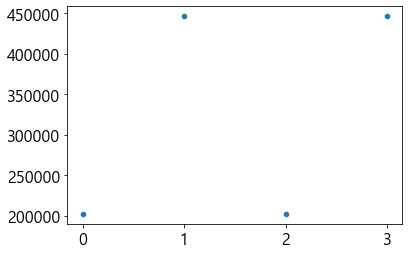

In [22]:
sns.scatterplot(data=sf.shape(0).bbox)

In [23]:
sf.shape(0).shapeTypeName

'POLYGON'

In [24]:
dir(sf.shape(0))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_from_geojson',
 'bbox',
 'parts',
 'points',
 'shapeType',
 'shapeTypeName']

In [25]:
sf.shape(0).bbox

[202579.88999999966, 446244.3699999992, 202692.3200000003, 446305.9000000004]

In [26]:
[p[0] for p in sf.shape(0).points]

[202646.1900000004,
 202635.61000000034,
 202639.33000000007,
 202649.91000000015,
 202690.8200000003,
 202692.3200000003,
 202637.90000000037,
 202647.86000000034,
 202644.13999999966,
 202634.1799999997,
 202581.58000000007,
 202579.88999999966,
 202646.1900000004]

In [27]:
check_list = []
for p in sf.shape(0).points:
    if p[0] in check_list:
        print(p[0])
    
    check_list.append(p[0])

202646.1900000004


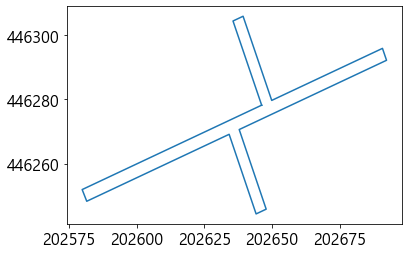

In [28]:
plt.plot([p[0] for p in sf.shape(0).points], [p[1] for p in sf.shape(0).points])

In [29]:
len(sf)

34503

In [30]:
count = 0
for i in range(len(sf)):
    
    count += 1

In [31]:
dir(sf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__fieldposition_lookup',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'close',
 'dbf',
 'encoding',
 'encodingErrors',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'load_dbf',
 'load_shp',
 'load_shx',
 'mbox',
 'numRecords',
 'numShapes',
 'record',
 'records',
 'shape'

In [32]:
count

34503

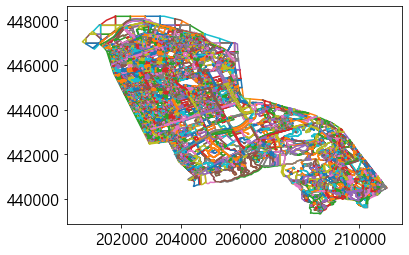

In [33]:
count = 0
for shape in sf.shapes():
    x_points = [p[0] for p in shape.points]
    y_points = [p[1] for p in shape.points]
    
    plt.plot(x_points, y_points)
    
    count += 1
    
    '''if count >= 5:
        break'''

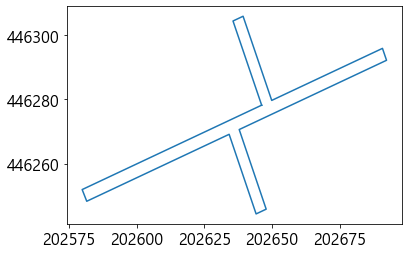

In [34]:
plt.plot([p[0] for p in sf.shape(0).points], [p[1] for p in sf.shape(0).points])

In [35]:
dir(sf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__fieldposition_lookup',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'close',
 'dbf',
 'encoding',
 'encodingErrors',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'load_dbf',
 'load_shp',
 'load_shx',
 'mbox',
 'numRecords',
 'numShapes',
 'record',
 'records',
 'shape'

In [44]:
sf.records()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 6: invalid start byte

In [45]:
shp_dir = basedir + foldernames[0] + '/LSMD_CONT_LDREG_11680.shp'
dbf_dir = basedir + foldernames[0] + '/LSMD_CONT_LDREG_11680.dbf'

In [46]:
sf2 = shapefile.Reader(shp=shp_dir, dbf=dbf_dir)

ShapefileException: The shp arg must be file-like.

In [54]:
sf_dbf = shapefile.Reader(dbf_dir, encoding='euc-kr')

In [48]:
dir(sf_dbf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__fieldposition_lookup',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'close',
 'dbf',
 'encoding',
 'encodingErrors',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'load_dbf',
 'load_shp',
 'load_shx',
 'mbox',
 'numRecords',
 'numShapes',
 'record',
 'records',
 'shape'

In [49]:
sf_dbf.shapeRecords

In [50]:
print(sf_dbf)

shapefile Reader
    34503 shapes (type 'POLYGON')
    34503 records (6 fields)


In [51]:
print(sf)

shapefile Reader
    34503 shapes (type 'POLYGON')
    34503 records (6 fields)


In [52]:
sf.fields

[('DeletionFlag', 'C', 1, 0),
 ['pnu', 'C', 19, 0],
 ['jibun', 'C', 15, 0],
 ['bchk', 'C', 1, 0],
 ['sgg_oid', 'N', 10, 0],
 ['col_adm_se', 'C', 5, 0]]

In [55]:
sf_dbf.record(0)

Record #0: ['1168010800100670026', '67-26 도', '1', 118535, '11680']

In [56]:
sf = shapefile.Reader(basedir + foldernames[0] + '/LSMD_CONT_LDREG_11680.shp', encoding='euc-kr')

In [57]:
sf.record(0)

Record #0: ['1168010800100670026', '67-26 도', '1', 118535, '11680']

In [58]:
for i in range(20):
    print(sf.record(i))

Record #0: ['1168010800100670026', '67-26 도', '1', 118535, '11680']
Record #1: ['1168010800100670027', '67-27 대', '1', 118536, '11680']
Record #2: ['1168010800100670028', '67-28 대', '1', 118537, '11680']
Record #3: ['1168010800100680000', '68 대', '1', 118538, '11680']
Record #4: ['1168010800100680001', '68-1 대', '1', 118539, '11680']
Record #5: ['1168010700106520015', '652-15 대', '1', 118540, '11680']
Record #6: ['1168010500101710000', '171 대', '1', 118541, '11680']
Record #7: ['1168010700106520018', '652-18 도', '1', 118542, '11680']
Record #8: ['1168010700106520019', '652-19 대', '1', 118543, '11680']
Record #9: ['1168010700106530000', '653 대', '1', 118544, '11680']
Record #10: ['1168010700106530001', '653-1 대', '1', 118545, '11680']
Record #11: ['1168010700106530002', '653-2 대', '1', 118546, '11680']
Record #12: ['1168010700106530003', '653-3 대', '1', 118547, '11680']
Record #13: ['1168010700106390010', '639-10 대', '1', 118548, '11680']
Record #14: ['1168010700106420010', '642-10 대', 

In [59]:
from polylabel import polylabel

In [62]:
sf.shape(0).points

[(202646.1900000004, 446278.22000000067),
 (202635.61000000034, 446304.4199999999),
 (202639.33000000007, 446305.9000000004),
 (202649.91000000015, 446279.69999999925),
 (202690.8200000003, 446295.9000000004),
 (202692.3200000003, 446292.1899999995),
 (202637.90000000037, 446270.6300000008),
 (202647.86000000034, 446245.8499999996),
 (202644.13999999966, 446244.3699999992),
 (202634.1799999997, 446269.1500000004),
 (202581.58000000007, 446248.3100000005),
 (202579.88999999966, 446251.94999999925),
 (202646.1900000004, 446278.22000000067)]

In [63]:
polylabel(sf.shape(0).points)

TypeError: 'float' object is not subscriptable

In [69]:
[[list(p) for p in sf.shape(0).points]]

[[[202646.1900000004, 446278.22000000067],
  [202635.61000000034, 446304.4199999999],
  [202639.33000000007, 446305.9000000004],
  [202649.91000000015, 446279.69999999925],
  [202690.8200000003, 446295.9000000004],
  [202692.3200000003, 446292.1899999995],
  [202637.90000000037, 446270.6300000008],
  [202647.86000000034, 446245.8499999996],
  [202644.13999999966, 446244.3699999992],
  [202634.1799999997, 446269.1500000004],
  [202581.58000000007, 446248.3100000005],
  [202579.88999999966, 446251.94999999925],
  [202646.1900000004, 446278.22000000067]]]

In [72]:
labeled = polylabel([[list(p) for p in sf.shape(0).points]])
labeled

[202648.630546876, 446277.5385156248]

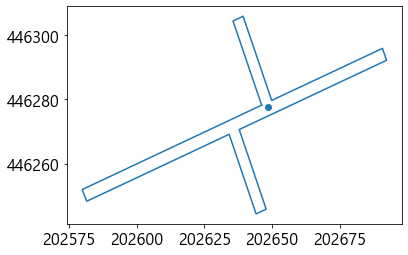

In [76]:
plt.plot([p[0] for p in sf.shape(0).points], [p[1] for p in sf.shape(0).points])
plt.scatter(labeled[0], labeled[1])

In [79]:
for i in range(20):
    print(sf.record(i))

Record #0: ['1168010800100670026', '67-26 도', '1', 118535, '11680']
Record #1: ['1168010800100670027', '67-27 대', '1', 118536, '11680']
Record #2: ['1168010800100670028', '67-28 대', '1', 118537, '11680']
Record #3: ['1168010800100680000', '68 대', '1', 118538, '11680']
Record #4: ['1168010800100680001', '68-1 대', '1', 118539, '11680']
Record #5: ['1168010700106520015', '652-15 대', '1', 118540, '11680']
Record #6: ['1168010500101710000', '171 대', '1', 118541, '11680']
Record #7: ['1168010700106520018', '652-18 도', '1', 118542, '11680']
Record #8: ['1168010700106520019', '652-19 대', '1', 118543, '11680']
Record #9: ['1168010700106530000', '653 대', '1', 118544, '11680']
Record #10: ['1168010700106530001', '653-1 대', '1', 118545, '11680']
Record #11: ['1168010700106530002', '653-2 대', '1', 118546, '11680']
Record #12: ['1168010700106530003', '653-3 대', '1', 118547, '11680']
Record #13: ['1168010700106390010', '639-10 대', '1', 118548, '11680']
Record #14: ['1168010700106420010', '642-10 대', 

In [81]:
pnu_df = pd.read_csv('./Prepped Data/서울특별시 건축물대장 법정동 코드정보.csv', encoding='euc-kr')
print(pnu_df.shape)
pnu_df.head()

(94131, 9)


,시군구코드,법정동코드,행정동코드,시도명,시군구명,법정동명,행정동명,적용시작일,적용만료일
0,27290,11800,617,대구광역시,달서구,유천동,유천동,20211129,20211129
1,41210,10600,655,경기도,광명시,일직동,일직동,20211129,99991231
2,27290,11900,617,대구광역시,달서구,대천동,유천동,20211129,20211129
3,27290,12000,617,대구광역시,달서구,월성동,유천동,20211129,20211129
4,27290,12100,617,대구광역시,달서구,월암동,유천동,20211129,20211129


In [91]:
pnu_df.dtypes

시군구코드     int64
법정동코드     int64
행정동코드     int64
시도명      object
시군구명     object
법정동명     object
행정동명     object
적용시작일     int64
적용만료일     int64
dtype: object

In [92]:
sf_df = pd.DataFrame({'시군구명':[], '법정동명':[], '지번':[], '지목':[]})

In [99]:
count = 0

for i in tqdm(range(len(sf))):
    sf_record = sf.record(i)
    
    pnu = sf_record[0]
    jibun_jimok = sf_record[1]
    
    sigungu_code = int(pnu[:5])
    bubjungdong_code = int(pnu[5:10])
    
    jibun = jibun_jimok.split(' ')[0]
    try:
        jimok = jibun_jimok.split(' ')[1]
    except:        
        jibun = jibun_jimok[:-1]
        jimok = jibun_jimok[-1]
        
    
    target_df = pnu_df[(pnu_df['시군구코드'] == sigungu_code) & (pnu_df['법정동코드'] == bubjungdong_code)]
    
    sf_df.loc[i, '시군구명'] = target_df['시군구명'].iloc[0]
    sf_df.loc[i, '법정동명'] = target_df['법정동명'].iloc[0]
    sf_df.loc[i, '지번'] = jibun
    sf_df.loc[i, '지목'] = jimok
    
    count += 1

100%|███████████████████████████████████████████████████████████████████████████| 34503/34503 [01:27<00:00, 392.95it/s]


In [101]:
print(sf_df.shape)
sf_df.head()

(34503, 5)


,pnu,시군구명,법정동명,지번,지목
0,1.168011e+18,강남구,논현동,67-26,도
1,1.168011e+18,강남구,논현동,67-27,대
2,1.168011e+18,강남구,논현동,67-28,대
3,1.168011e+18,강남구,논현동,68,대
4,1.168011e+18,강남구,논현동,68-1,대
